# Course 1:
# General Facts About Machine Learning. Linear Regression.

## 1. Machine learning. Supervised, unsupervised, reinforcement learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation 
plt.rcParams["animation.html"] = "html5"

% matplotlib inline

We begin by loading some data: [The World Happiness Report 2017](https://www.kaggle.com/unsdsn/world-happiness) and [The number of partners during lifetime](https://www.statista.com/statistics/248856/average-number-of-sexual-partners-in-selected-countries-worldwide/)

In [2]:
df1 = pd.read_csv('data/happiness2017.csv')
df2 = pd.read_csv('data/Number_of_Sexual_Partners_You_Have_Had.csv')

In [3]:
df1.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
df1.drop(['Happiness.Rank','Whisker.high','Whisker.low','Freedom','Generosity'],axis=1,inplace=True)

In [5]:
df2.head()

,Date,1/1/2005
0,Number of sexual partners- Turkey,14.5
1,Number of sexual partners- Australia,13.3
2,Number of sexual partners- New Zealand,13.2
3,Number of sexual partners- Iceland,13.0
4,Number of sexual partners- South Africa,12.5


df2 needs to be cleaned

In [6]:
df2.columns = ['Country','partners']

df2['Country'] = df2['Country'].map(lambda s: s.split('- ')[1]) # function that spitls a string on the '-'
#and takes the second part

In [7]:
df2.head()

,Country,partners
0,Turkey,14.5
1,Australia,13.3
2,New Zealand,13.2
3,Iceland,13.0
4,South Africa,12.5


In [8]:
df = pd.merge(df1,df2,on='Country')

In [9]:
df.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual,partners
0,Norway,7.537,1.616463,1.533524,0.796667,0.315964,2.277027,12.1
1,Denmark,7.522,1.482383,1.551122,0.792566,0.400770,2.313707,9.3
2,Iceland,7.504,1.480633,1.610574,0.833552,0.153527,2.322715,13.0
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.367007,2.276716,11.1
4,Finland,7.469,1.443572,1.540247,0.809158,0.382612,2.430182,12.4


## 2. Regression

In [10]:
df.set_index('Country',inplace=True)

Let's consider only two variables: The happiness score and the no of partners.

In [11]:
data = df.loc[:,['partners','Happiness.Score']].rename(columns = {'partners' : 'partners', 
                                                                  'Happiness.Score' : 'happiness'})
data.dropna(inplace=True)

In [12]:
data.head()

,partners,happiness
Country,,
Norway,12.1,7.537
Denmark,9.3,7.522
Iceland,13.0,7.504
Switzerland,11.1,7.494
Finland,12.4,7.469


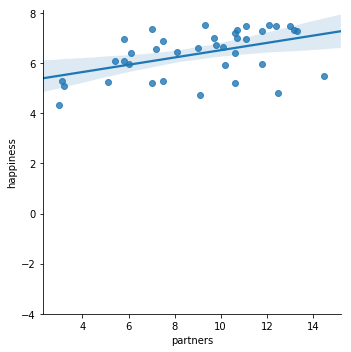

In [13]:
g = sns.lmplot("partners", "happiness", data=data, fit_reg=True)#kind="reg")
g.set(ylim=(-4, None))

In [14]:
def model(a,b,x): 
    '''
    function that computes the model
    ARGUMENTS: a,b,x floating point numbers
    RETURNS: floating point number, the estimated (predicted value) corrsponding to the input x
    '''
    return a*x+b

### 3. Training the model: Gradient Descent

<img src="images/scara.jpg" width="900">


for a sigle training example $(x^{(i)},y^{(i)})$, denote $\hat y ^{(i)} = a x^{(i)}+ b$ the prediction.
The loss will be $l(y^{(i)},\hat y^{(i)}) = (\hat y^{(i)} - y^{(i)})^2$ (square loss) and define the cost function
$C(a,b) = \frac{1}{n} \sum_i l(y^{(i)},\hat y^{(i)}) $

In [15]:
def totLoss(y,y_pred):
    '''
    function that computes the total sqare loss
    ARGUMENTS: y,y_pred arrays (mathematical vectors)
    RETURNS: floating point number, the sum of the losses (y - y_pred)**2 for each training example (x, y)
    '''
    return ((y-y_pred)**2).sum()

def cost(y,a,b,x):
    '''
    the cost function
    ARGUMENTS: a,b floating point numbers, x, y, arrays (mathematical vectors)
    RETURNS: floating point number, the cost corresponding to our choice of parameters a,b
    '''
    return totLoss(y, model(a,b,x)) / n


* Idea: minimize the cost function

* Derivatives, gradient

Start with randomly chosen $a,b$, and simultaneously update them:

$$a =a -\alpha \frac{\partial C}{\partial a}$$
$$b = b - \alpha \frac{\partial C}{\partial b}$$

In [16]:
#set some initial values for the parameters
a_guess=-1
b_guess=10

n = len(data)
x = data['partners'].values
y = data['happiness'].values


In [17]:
cost(y, a_guess, b_guess, x)

42.419551344376849

In [18]:
lr=0.01
def upd():
    global a_guess, b_guess
    y_pred = model(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * 2 * (y_pred - y)
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [19]:
fig = plt.figure(dpi=100, figsize=(7, 7))
plt.scatter(x,y)
line, = plt.plot(x,model(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(model(a_guess,b_guess,x))
    for i in range(74): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani


In [20]:
cost(y, a_guess, b_guess, x)

0.66184437155243836

In [21]:
for i in range(100):
    upd()

In [22]:
cost(y, a_guess, b_guess, x)

0.66183901104375753

### 4. Using the model for predictions

In [23]:
model(a_guess,b_guess,10)

6.5199853965837917

In [24]:
model(a_guess,b_guess,30)

9.4062199145621008

QUESTION: difference between the a,b parameters and the learning rate. Effect of different values for the learnig rate